In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

In [15]:
train_data=pd.read_csv(r"Data1\house_data.csv")


In [16]:
train_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [17]:
print(train_data.shape)

(506, 14)


In [18]:
print(train_data.iloc[0:5,[0,1,2,3,-3,-2,-1]])

      CRIM    ZN  INDUS  CHAS       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  396.90   5.33  36.2


In [25]:
feature=train_data.iloc[:,:-1]
print(feature.iloc[0:5,[0,1,2,3,-3,-2,-1]])

      CRIM    ZN  INDUS  CHAS  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0     18.7  396.90   5.33


In [26]:
numeric_feature=feature.dtypes[feature.dtypes!="object"].index
feature[numeric_feature]=feature[numeric_feature].apply(lambda x:(x-x.mean())/(x.std()))
feature[numeric_feature]=feature[numeric_feature].fillna(0)


In [27]:
numeric_feature

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [28]:
feature[numeric_feature]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [29]:
feature.shape

(506, 13)

通过设置 dtype=int，指定生成的独热编码列的数据类型为整型（int）。默认情况下，pd.get_dummies() 生成的列类型是布尔型（bool）或者是浮点型（float），尤其是如果有 NaN 值的情况下。
将类型设置为 int 可以确保每个独热编码列中的值要么为 0（表示不属于该类别），要么为 1（表示属于该类别），且不包含 NaN 值。

In [30]:
features=pd.get_dummies(feature,dummy_na=True,dtype=int)
features.shape

(506, 13)

In [32]:
n_train=train_data.shape[0]
train_features=torch.tensor(features[:n_train].values,dtype=torch.float32)
test_features=torch.tensor(features[n_train:].values,dtype=torch.float32)
train_labels=torch.tensor(train_data.MEDV.values.reshape(-1,1),dtype=torch.float32)

In [33]:
train_labels

tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000],
        [28.7000],
        [22.9000],
        [27.1000],
        [16.5000],
        [18.9000],
        [15.0000],
        [18.9000],
        [21.7000],
        [20.4000],
        [18.2000],
        [19.9000],
        [23.1000],
        [17.5000],
        [20.2000],
        [18.2000],
        [13.6000],
        [19.6000],
        [15.2000],
        [14.5000],
        [15.6000],
        [13.9000],
        [16.6000],
        [14.8000],
        [18.4000],
        [21.0000],
        [12.7000],
        [14.5000],
        [13.2000],
        [13.1000],
        [13.5000],
        [18.9000],
        [20.0000],
        [21.0000],
        [24.7000],
        [30.8000],
        [34.9000],
        [26.6000],
        [25.3000],
        [24.7000],
        [21.2000],
        [19.3000],
        [20.0000],
        [16.6000],
        [14.4000],
        [19.4000],
        [19.7000],
        [20.5000],
        [25.

In [34]:

in_features=train_features.shape[1]

In [53]:
def model_net(in_features):
    return nn.Sequential(nn.Flatten(),nn.Linear(in_features,128),nn.Sigmoid(),
            nn.Linear(128,1))


#nn.Sequential(nn.Linear(in_features,1))

In [36]:
x=torch.randn(size=(10,330))
for layer in model:
    x=layer(x)
    print(layer.__class__.__name__,"output shape : ",x.shape)

NameError: name 'model' is not defined

In [37]:
def logrmse(net,feature,labels,criterion):
    net.eval()
    with torch.no_grad():
        clipped_preds=torch.clamp(net(feature),1,float("inf"))
        rmse=torch.sqrt(criterion(torch.log(clipped_preds),torch.log(labels)))
    return rmse.item()

In [38]:
import torch.utils.data as data
def load_array(data_arrays,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

In [39]:
def train(model,train_features,train_labels,valid_features,valid_labels,num_epochs,learning_rate,weight_decay,batch_size):
    train_loss,valid_loss=[],[]
    criterion=nn.MSELoss()
    train_iter=load_array([train_features,train_labels],batch_size)
    optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=weight_decay)
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model=model.to(device)
    train_features,train_labels=train_features.to(device),train_labels.to(device)
    if valid_labels is not None:
        valid_features,valid_labels=valid_features.to(device),valid_labels.to(device)
    model.train()
    for epoch in range(num_epochs):
        for X,y in train_iter:
            X,y=X.to(device),y.to(device)
            optimizer.zero_grad()
            loss=criterion(model(X),y)
            loss.backward()
            optimizer.step()
        train_loss.append(logrmse(model,train_features,train_labels,criterion))
        if valid_labels is not None:
            valid_loss.append(logrmse(model,valid_features,valid_labels,criterion))
    return train_loss,valid_loss

In [40]:
def get_K_fold_data(k,i,X,y):
    assert k>2,"only support k>=3 folds"
    fold_size=X.shape[0]//k
    X_train,y_train=None,None
    for j in range(k):
        idx=slice(j*fold_size,(j+1)*fold_size)
        X_part,y_part=X[idx,:],y[idx,:]
        if j==i:
            X_valid,y_valid=X_part,y_part
        elif X_train is None:
            X_train,y_train=X_part,y_part
        else:
            X_train=torch.cat([X_train,X_part],dim=0)
            y_train=torch.cat([y_train,y_part],dim=0)
    return X_train,y_train,X_valid,y_valid
            


In [41]:
from matplotlib_inline import  backend_inline
import matplotlib.pyplot as plt
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale="linear",yscale="linear",ftms=("-","m--","g-.","r:"),figsize=(8,6),axes=None):
    if legend is None:
        legend=[]
    backend_inline.set_matplotlib_formats("svg")
    plt.rcParams["figure.figsize"]=figsize
    if axes:
        axes=axes
    else:
        axes=plt.gca()
    
    def has_one_axis(X):
        return (hasattr(X,"ndim") and X.ndim==1 or isinstance(X,list) and not hasattr(X[0],"__len__"))
    
    if has_one_axis(X):
        X=[X]
    if Y is None:
        X,Y=[[]]*len(X),X
    elif has_one_axis(Y):
        Y=[Y]
    if len(X)!=len(Y):
        X=X*len(Y)
    axes.cla()
    for x,y,ftm in zip(X,Y,ftms):
        if len(x):
            axes.plot(x,y,ftm)
        else:
            axes.plot(y,ftm)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()


In [42]:
def K_Fold_CV(K,X_train,y_train,num_epochs,learning_rate,weight_decay,batch_size,model_net,in_features):
    train_loss_sum,valid_loss_sum=0,0
    for i in range(K):
        data=get_K_fold_data(K,i,X_train,y_train)
        net=model_net(in_features)
        train_loss,valid_loss=train(net,*data,num_epochs,learning_rate,weight_decay,batch_size)
        for name, param in net.named_parameters():
            print(f"Parameter name: {name}")
            print(f"Parameter value: {param.data}")
        train_loss_sum+=train_loss[-1]
        valid_loss_sum+=valid_loss[-1]
        if i==0:
            plot(list(range(1,num_epochs+1)),[train_loss,valid_loss],xlabel="epoch",ylabel="rmse",xlim=[1,num_epochs],ylim=[0.1,10],legend=["train","valid"],yscale="log")
        print(f"{i+1} train log rmse {float(train_loss[-1]):.6f} valid log rmse {float(valid_loss[-1]):.6f}")
    return train_loss_sum/K,valid_loss_sum/K

In [43]:
in_features

13

Parameter name: 1.weight
Parameter value: tensor([[  2.8602,   3.3733,  28.9531,  ...,   8.0539, -43.9292,  77.3520],
        [ 12.7598,  -2.3540,   5.9693,  ...,  12.2703,  -6.0209,  22.1653],
        [ 26.0085,  35.4722,  10.6478,  ..., -75.6714,  -8.8088, -11.3338],
        ...,
        [ 13.2935,  20.9282,  10.6285,  ...,  -8.5154,  14.9277,   7.7847],
        [ 19.2285,  45.4109,  -0.8651,  ...,   0.1525,  31.6762, -95.7351],
        [ 38.8731,  35.8579, -38.6444,  ...,  -6.5711, -22.1735,  -2.5694]],
       device='cuda:0')
Parameter name: 1.bias
Parameter value: tensor([-11.3373, -11.5997,   1.4743, -18.5461, -13.0493,  -7.2439, -15.2984,
        -42.0865, -28.2275,  -8.1609, -12.2953, -24.5906,  -3.3627, -26.4222,
        -28.8563,  -9.2602, -32.5234, -25.3785, -13.1567, -14.3780, -17.0511,
        -18.5167,  -7.3060, -21.8357, -19.8183, -13.3197,   0.8352, -13.4509,
        -34.4124, -31.0902, -12.1433, -16.4307, -14.5109, -57.6401, -11.9230,
         -7.9738, -43.5631, -12.55

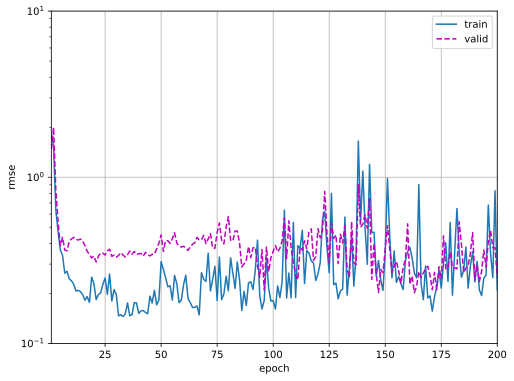

In [57]:
K=5
num_epochs=200
lr=1.5
weight_decay=0
batch_size=64
train_l,valid_l=K_Fold_CV(K,train_features,train_labels,num_epochs,lr,weight_decay,batch_size,model_net,in_features=in_features)
print(f"{K}-Fold CV，mean train log rmse:{float(train_l):.6f},mean valid log rmse: {float(valid_l):.6f}")

In [153]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size,in_features):
    net = model_net(in_features)
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net=net.to(device)
    test_features=test_features.to(device)
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs],ylim=[0.1,10], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    preds = net(test_features).detach().cpu().numpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

训练log rmse：0.136109


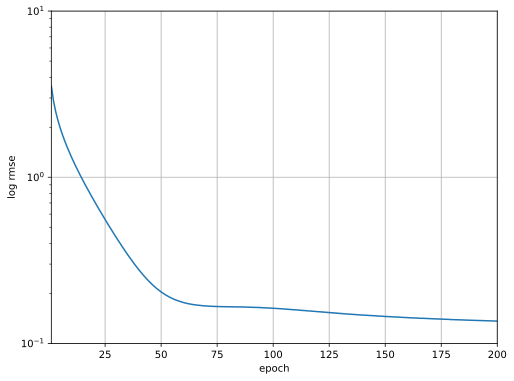

In [154]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size,in_features
               )